<a href="https://colab.research.google.com/github/vaishnavipatil29/NN_DL_Lab/blob/main/Spring_22_NNDL_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 2 : Multi Class Classification Using Perceptron 

Name : Joshitha Gandra, Vaishnavi Patil

Roll Number : 180020009, 180020039



# **Problem 1** : Demonstrate the 2-input, 2-output neural network, to perform 4 class, classification task.

  1. Generate appropriate data synthetically (Ex: Multivariate Gaussian data with different mean vectors and Identity covariance matrix can be used )
  2. Have to convert the class labels (0, 1, 2, 3) to its corresponding binary value.
  3. Use appropriate activation function and learning rule .
  4. Draw the learned separating hyper planes in each iteration. (using the information
  from the learned weights).
  5. After the network is learned, a independent test set can be used to validate the performance. (Performance can be shown through accuracy/error percentage, justify
  the error by drawing the separating hyper-plane over the test set data (use different
  color code for different class label) )

##Write down the Objectives, Hypothesis and Experimental description for the above problem



##Objective :
- To Demonstrate 2 Input 2 Output Neural Network to perform 4 class classification task. 

##Hypothesis :
- For 2 Input 2 Output task, perceptron will learn the weight values to correctly classify given data points into 4 classes when trained by using 2 neurons. 

## Programming : 
  Please write a program to demonstrate the same

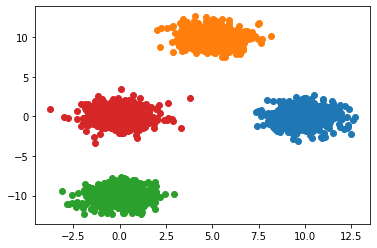

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

covariance = [[1, 0], [0, 1]] #Identity covariance matrix
np.random.seed(0)

# generating data of mean (10,0) (0,10) (0,-10) (0,0) and Identity covariance matrix
cluster1 = np.random.multivariate_normal((10,0), covariance, 500).T
cluster2 = np.random.multivariate_normal((5,10), covariance, 500).T
cluster3 = np.random.multivariate_normal((0,-10), covariance, 500).T
cluster4 = np.random.multivariate_normal((0,0), covariance, 500).T

x = np.concatenate((cluster1, cluster2, cluster3, cluster4), axis=1).T

# Plotting data
plt.figure()
plt.scatter(cluster1[0], cluster1[1])
plt.scatter(cluster2[0], cluster2[1])
plt.scatter(cluster3[0], cluster3[1])
plt.scatter(cluster4[0], cluster4[1])
plt.show()

In [ ]:
# labels, test_train 

data = []
count = 0

for i,j in x:
  if(count<500):
    data.append([i,j,0,0,1])
    count+=1
    continue
  if(count<1000):
    data.append([i,j,0,1,2])
    count+=1
    continue
  if(count<1500):
    data.append([i,j,1,0,3])
    count+=1
    continue
  if(count<2000):
    data.append([i,j,1,1,4])
    count+=1
    continue

np.random.shuffle(data)

bias = np.ones(len(data))
data = np.column_stack((bias,data))

data_train = data[:1500]
data_test = data[1500:]

In [ ]:
data[:5]

array([[  1.        ,  12.69622405,  -0.07392467,   0.        ,
          0.        ,   1.        ],
       [  1.        ,   5.01018552,  12.19829634,   0.        ,
          1.        ,   2.        ],
       [  1.        ,   5.46637957,   9.90560749,   0.        ,
          1.        ,   2.        ],
       [  1.        ,  -1.64155395,  -0.89002555,   1.        ,
          1.        ,   4.        ],
       [  1.        ,   0.51256223, -10.3591166 ,   1.        ,
          0.        ,   3.        ]])

In [ ]:
def activationfn(v):
    if (v >= 0):
        return 1
    else:
        return 0
        
def plot(i,data,w, err):
  if(i%50 == 0):
      print('iteration : ',i)
      print('error : ',err)

      x1 = np.linspace(-5, 15, 100)
      y = -1*(x1*w[1] + w[0])/w[2]

      plt.figure()
      plt.scatter(data[:,1], data[:,2], s=3)
      plt.scatter(x1, y, s=3)

      plt.show()


def perceptron_learning(data, i, lr, w, num_epochs):

   error = []

   for j in range(num_epochs):

    y = data[:,:3] @ w

    # activation function
    y=[activationfn(i) for i in y]
    
    err = data[:,-i]-y

    w_change = (err @ data[:,:3])*lr
    w_change = w_change.reshape(w_change.shape[0],1)
    
    w = w + w_change

    err = np.sum(np.abs(err))/data.shape[0]
    error.append(err)

    #plotting
    plot(j,data,w, err)

   return w, error

[[0.88105193]
 [0.65047843]
 [0.69994188]]
iteration :  0
error :  0.30133333333333334


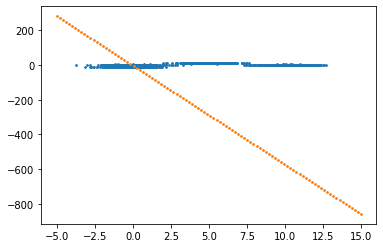

iteration :  50
error :  0.004666666666666667


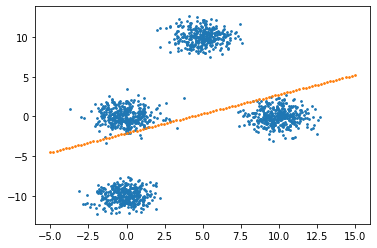

iteration :  100
error :  0.0013333333333333333


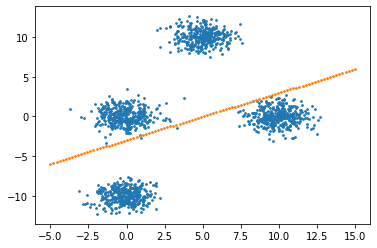

iteration :  150
error :  0.0013333333333333333


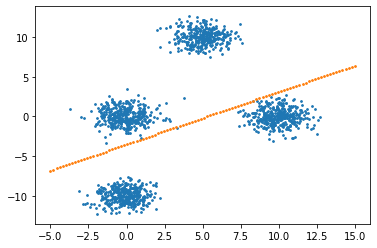

iteration :  200
error :  0.0


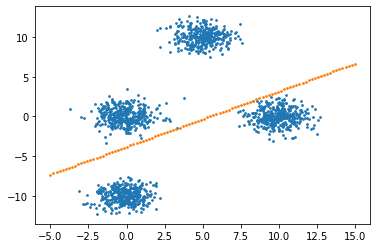

iteration :  250
error :  0.0


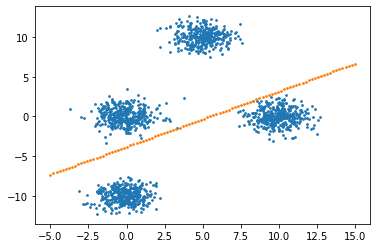

iteration :  300
error :  0.0


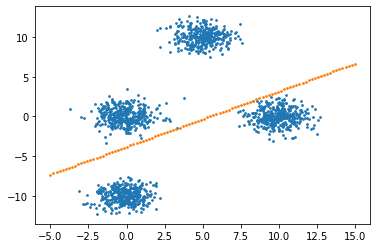

iteration :  350
error :  0.0


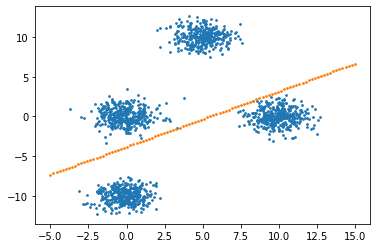

iteration :  400
error :  0.0


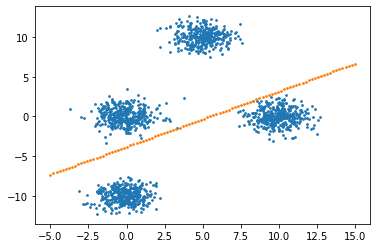

iteration :  450
error :  0.0


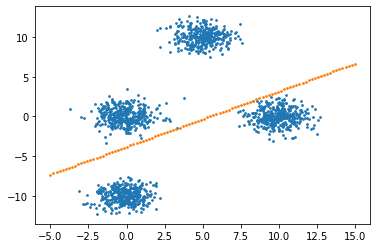



iteration :  0
error :  0.7873333333333333


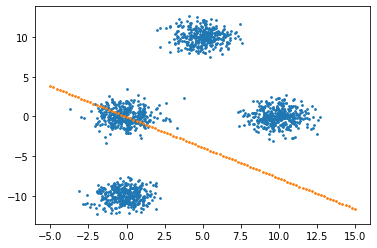

iteration :  50
error :  0.017333333333333333


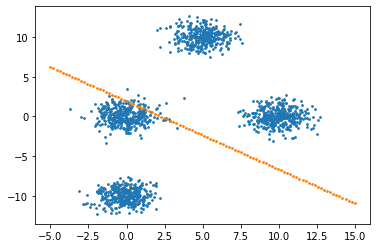

iteration :  100
error :  0.002


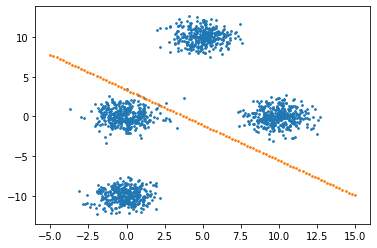

iteration :  150
error :  0.0006666666666666666


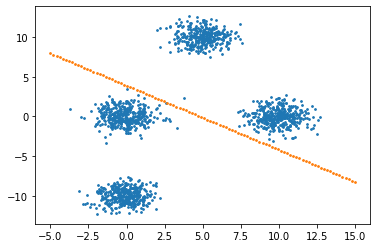

iteration :  200
error :  0.0006666666666666666


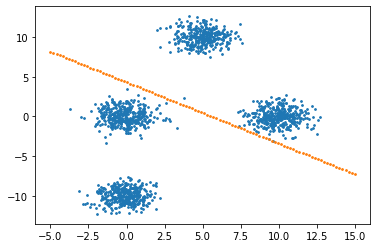

iteration :  250
error :  0.0006666666666666666


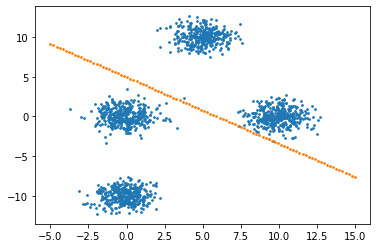

iteration :  300
error :  0.0013333333333333333


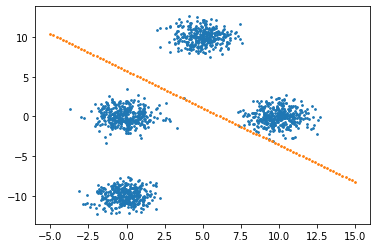

iteration :  350
error :  0.0


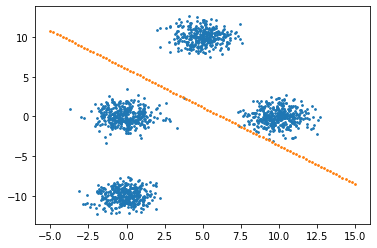

iteration :  400
error :  0.0


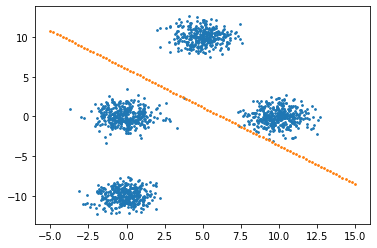

iteration :  450
error :  0.0


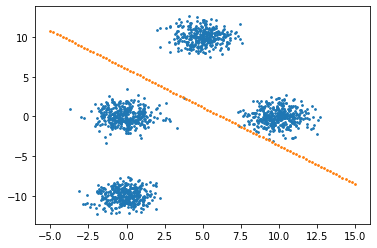

In [ ]:
 # learning rate
lr=0.5

#weight initialization
w = np.random.rand(3,1)
print(w)
num_epochs = 500

i=1
w1, err1 = perceptron_learning(data_train, i+1, lr, w, num_epochs)
print('\n')
i=2
w2, err2 = perceptron_learning(data_train, i+1, lr, w, num_epochs)

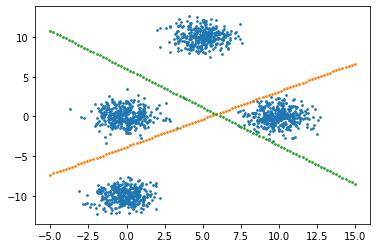

In [ ]:
x1 = np.linspace(-5, 15, 100)
y1 = -1*(x1*w1[1] + w1[0])/w1[2]
y2 = -1*(x1*w2[1] + w2[0])/w2[2]

plt.figure()
plt.scatter(data_train[:,1], data_train[:,2], s=3)
plt.scatter(x1, y1, s=3)
plt.scatter(x1, y2, s=3)

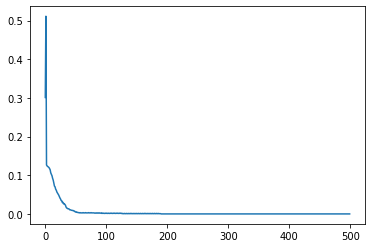

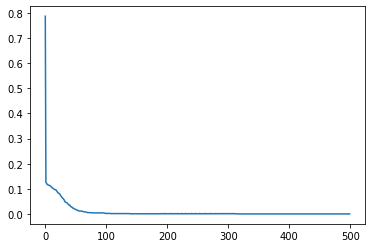

In [ ]:
plt.plot(list(range(num_epochs)), err1)
plt.show()

plt.plot(list(range(num_epochs)), err2)
plt.show()

In [ ]:
def prediction(data,w):
   
      y = data @ w
      y=[activationfn(i) for i in y]

      return y

In [ ]:
pred1 = prediction(data_test[:,:3], w2)
pred2 = prediction(data_test[:,:3], w1)

pred = [1 if i == 0 and j==0 else 2 if i == 0 and j==1 else 3 if i == 1 and j==0 else 4 for i,j in zip(pred1, pred2)]

In [ ]:
accuracy = sum(1 for x,y in zip(pred,data_test[:,-1]) if x == y) / len(pred)

In [ ]:
accuracy

0.998

## Inferences and Conclusion : State all the key observations and conclusion

1. The data used was Multivariate Gaussian data of mean (10,0) (0,10) (0,-10) (0,0) and Identity covariance matrix.

2. The 4 class, classification task was performed using 2-output neurons. Binary outputs were used to denote the four outputs. And the perceptron learning algorithm was used and to trainthe perceptron twice for each of the output neuron.

3. Accuracy of 100% was obtained on the train dataset and 99.8% on the test dataset.

4. It took around 100-200 epochs for the error to converge for both outputs.

5. The 4 classes were divided by 2 lines of opposite slopes.